<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/Project_4_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Twitter_Data.csv.zip to Twitter_Data.csv (3).zip


In [ ]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("Twitter_Data.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Check extracted files
os.listdir()


['.config',
 'Twitter_Data.csv',
 'Twitter_Data.csv (2).zip',
 'Twitter_Data.csv.zip',
 'Twitter_Data.csv (1).zip',
 'Twitter_Data.csv (3).zip',
 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Twitter_Data.csv")
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape


(162980, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df.isnull().sum()


,0
clean_text,4
category,7


In [ ]:
# Remove missing values
df.dropna(inplace=True)

# Keep only first two columns (text & sentiment)
df = df.iloc[:, :2]
df.columns = ['text', 'sentiment']

# Convert sentiment to integer
df['sentiment'] = df['sentiment'].astype(int)

# Map sentiment values
df['sentiment'] = df['sentiment'].map({
    -1: 'Negative',
     0: 'Neutral',
     1: 'Positive'
})

df.head()


,text,sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,sentiment,clean_text
0,when modi promised “minimum government maximum...,Negative,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,Neutral,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,Positive,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,Positive,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,Positive,answer among powerful world leader today trump...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7270970117199484
              precision    recall  f1-score   support

    Negative       0.88      0.44      0.58      7152
     Neutral       0.84      0.66      0.74     11067
    Positive       0.65      0.93      0.77     14375

    accuracy                           0.73     32594
   macro avg       0.79      0.67      0.70     32594
weighted avg       0.77      0.73      0.72     32594



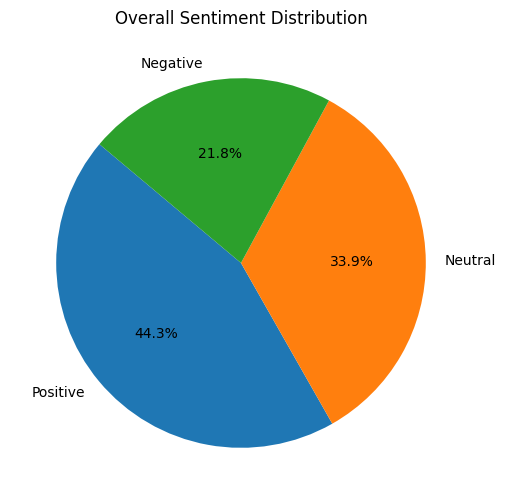

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Overall Sentiment Distribution")
plt.show()


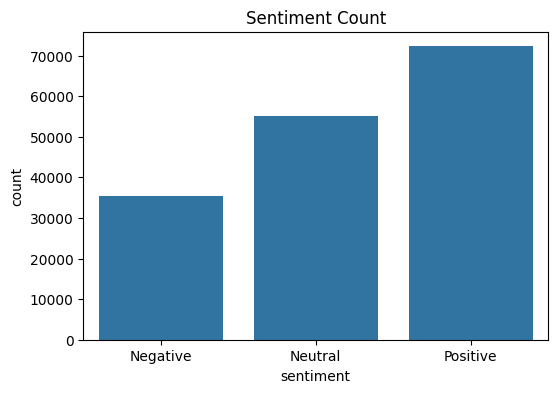

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Count")
plt.show()


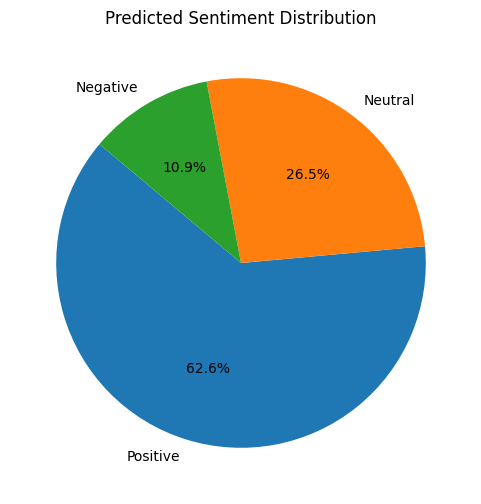

In [ ]:
pred_counts = pd.Series(y_pred).value_counts()

plt.figure(figsize=(6,6))
plt.pie(pred_counts,
        labels=pred_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title("Predicted Sentiment Distribution")
plt.show()


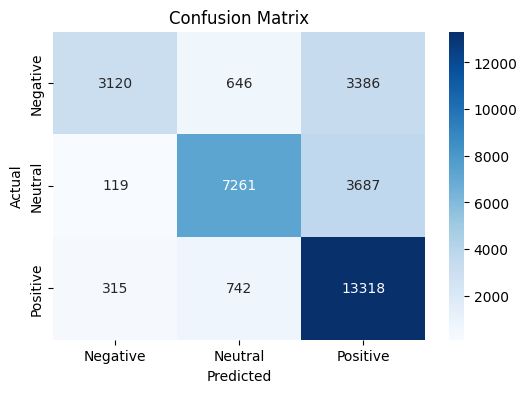

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
sample_text = [
    "I love this product",
    "This is the worst experience ever",
    "It is okay, not bad"
]

sample_clean = [clean_text(text) for text in sample_text]
sample_vector = vectorizer.transform(sample_clean)

model.predict(sample_vector)


array(['Positive', 'Negative', 'Positive'], dtype='<U8')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving apps.csv.zip to apps.csv.zip


In [ ]:
import zipfile, os

with zipfile.ZipFile("apps.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

os.listdir()


['.config',
 'Twitter_Data.csv',
 'Twitter_Data.csv (2).zip',
 'Twitter_Data.csv.zip',
 'Twitter_Data.csv (1).zip',
 'apps.csv',
 'Twitter_Data.csv (3).zip',
 'apps.csv.zip',
 'sample_data']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("apps.csv")
df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape


(9659, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
App,0
Category,0
Rating,1463
Reviews,0
Size,1227
Installs,0
Type,0
Price,0
Content Rating,0


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')


In [54]:
# Copy original
data = df.copy()

# 1) Strip whitespace from column names
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('-', '_').str.lower()

# Example column fixes (adapt to your columns)
# Convert price like '$2.99' -> float
if 'price' in data.columns:
    data['price'] = data['price'].astype(str).str.replace(r'[\$\,]', '', regex=True).replace('Free','0').replace('', np.nan)
    data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Convert installs like '1,000,000+' -> int
if 'installs' in data.columns:
    data['installs'] = data['installs'].astype(str).str.replace(r'[+,]', '', regex=True)
    data['installs'] = pd.to_numeric(data['installs'], errors='coerce')

# Convert size like '19M' or 'Varies with device'
if 'size' in data.columns:
    def parse_size(s):
        if pd.isna(s): return np.nan
        s = s.strip()
        if s.lower() == 'varies with device': return np.nan
        if s.endswith('k') or s.endswith('K'):
            return float(s[:-1]) / 1024  # convert KB to MB
        if s.endswith('m') or s.endswith('M'):
            return float(s[:-1])
        try:
            return float(s)
        except:
            return np.nan
    data['size_mb'] = data['size'].astype(str).apply(parse_size)

# Convert reviews to numeric
if 'reviews' in data.columns:
    data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')

# Convert rating to numeric
if 'rating' in data.columns:
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Dates: last_updated
if 'last_updated' in data.columns:
    data['last_updated'] = pd.to_datetime(data['last_updated'], errors='coerce')

data.head()


,unnamed:_0,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,size_mb
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8


In [56]:
import pandas as pd

# If df is not already loaded, load it
# df = pd.read_csv("apps.csv")

print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [57]:
print(df.columns)


Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')


In [58]:
# Select second and third columns safely
df = df.iloc[:, [1, 2]]

# Rename columns to standard names
df.columns = ['text', 'sentiment']

# Remove missing values
df.dropna(inplace=True)

df.head()


/tmp/ipython-input-2987881737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,text,sentiment
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN


In [59]:
# Make sentiment lowercase strings (safe for plots)
df['sentiment'] = df['sentiment'].astype(str).str.lower()

df['sentiment'].value_counts()


/tmp/ipython-input-228984535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].astype(str).str.lower()


,count
sentiment,
family,1832
game,959
tools,827
business,420
medical,395
personalization,376
productivity,374
lifestyle,369
finance,345


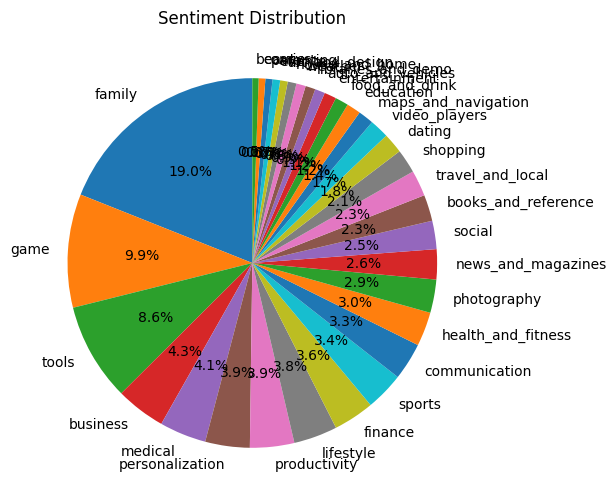

In [60]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


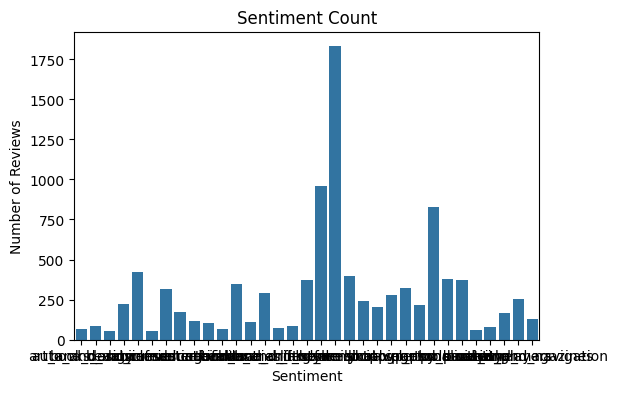

In [61]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Count")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


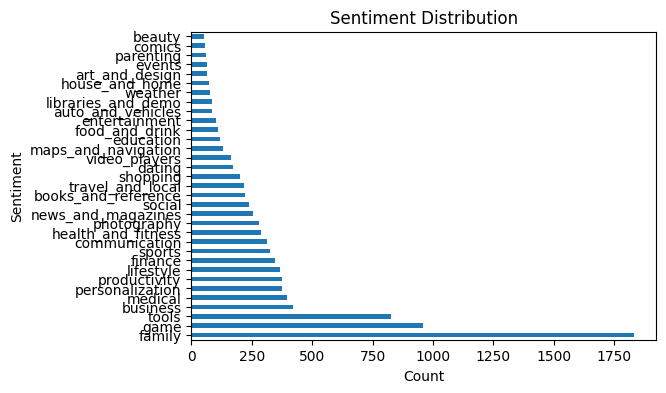

In [62]:
sentiment_counts.plot(kind='barh', figsize=(6,4))
plt.title("Sentiment Distribution")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.show()
